In [1]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
# %load_ext autoreload
# %autoreload 2

In [2]:
class Diffusion_debug_test(spatialpy.Model):

    def __init__(self, model_name="diffusion_debug_test"):
        spatialpy.Model.__init__(self, model_name)

        D_const = 0.01

        A = spatialpy.Species(name="A", diffusion_constant=D_const)
        self.add_species([A])

        self.mesh = spatialpy.Mesh.create_2D_domain(
            xlim=[-1, 1], ylim=[-1, 1], nx=50, ny=50, type_id=1.0, 
            mass=1.0, nu=1.0, fixed=True,  rho0=1.0, c0=1.0, P0=1.0
        )

        self.add_initial_condition(spatialpy.PlaceInitialCondition(A, 100000, [0,0,0]))

        self.timestep_size=.1
        self.num_timesteps=10
        self.output_freq=1

In [3]:
model = Diffusion_debug_test()

In [4]:
from spatialpy import Solver
sol = Solver(model, debug_level=0)
sol.compile()
%time result = sol.run()

CPU times: user 257 µs, sys: 4.12 ms, total: 4.37 ms
Wall time: 13.7 s


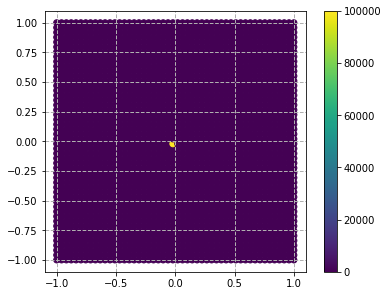

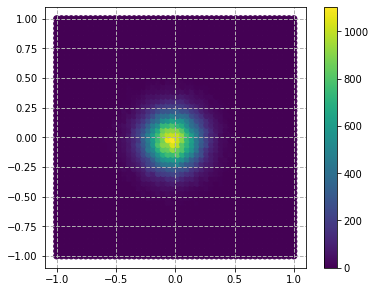

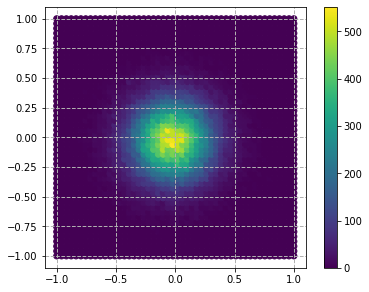

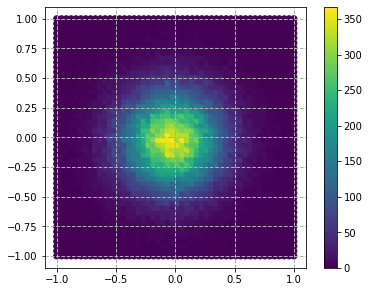

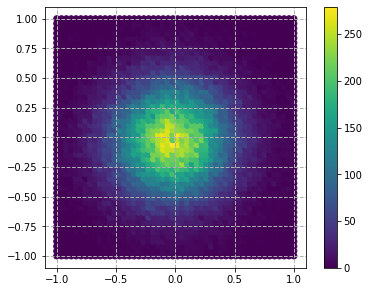

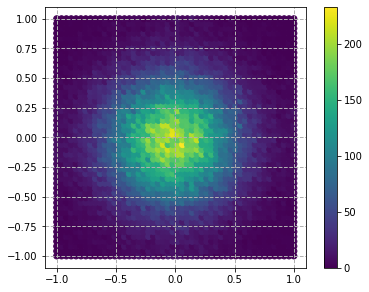

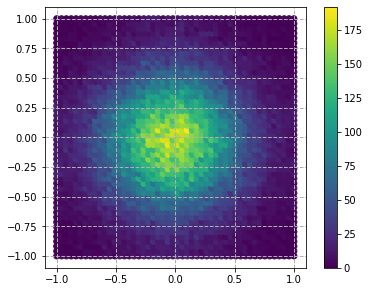

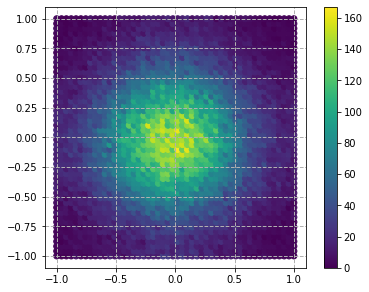

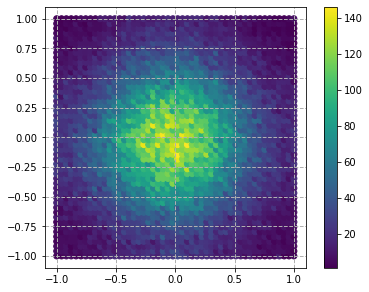

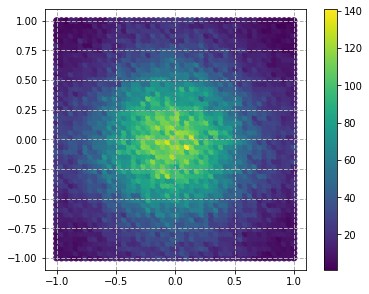

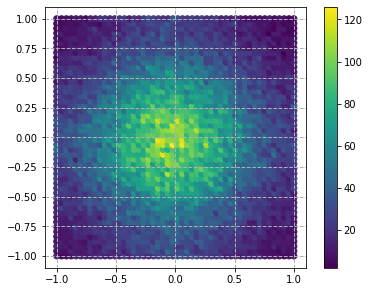

In [5]:
for i,t in enumerate(result.get_timespan()):
    #print(i,t)
    result.plot_species("A", i, use_matplotlib=True)

In [6]:
import numpy as np

In [7]:
def binit(x, y):
    # sqrt(x^2+y^2)
    bins = sorted(list(set(x)))
    bin_values = np.zeros(50)
    for i, v in enumerate(y):
        for j, b in enumerate(bins):
            if x[i] == b:
    #             print('found ', b, ' at index ', i)
                bin_values[j] += v
    return bins, bin_values

2500
[0. 0. 0. ... 0. 0. 0.]
2500
[0. 0. 0. ... 0. 0. 0.]


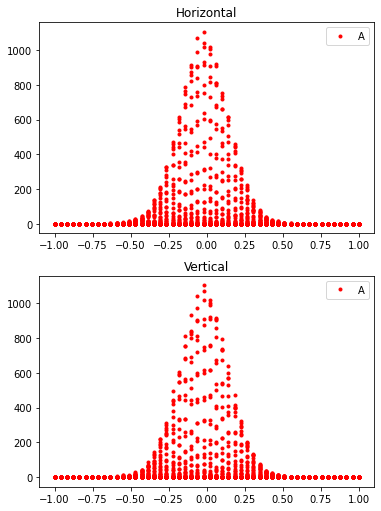

In [8]:


hx_vals = model.mesh.coordinates()[:, 0]
hA_vals = result.get_species("A", timepoints=10, concentration=False, debug=False)
vx_vals = model.mesh.coordinates()[:, 1]
vA_vals = result.get_species("A", timepoints=10, concentration=False, debug=False)
print(len(hA_vals))
print(hA_vals)
print(len(vA_vals))
print(vA_vals)

plt.figure(figsize=(6,6))
plt.subplots_adjust(top=1.2)
plt.subplot(2,1,1)
plt.title('Horizontal')

plt.plot(hx_vals,hA_vals,'.r', 
#         (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (1 - mu)**2 / (2 * sigma**2) )), '.g'
        )
plt.legend(['A'],loc='best')

plt.subplot(2,1,2)
plt.title('Vertical')

plt.plot(vx_vals,vA_vals,'.r')
plt.legend(['A'],loc='best')


In [9]:
dist_and_count = dict(zip(hx_vals, hA_vals))
print(len(hx_vals))
print(len(hA_vals))

2500
2500


In [10]:
hbins, hbin_values = binit(hx_vals, hA_vals)
vbins, vbin_values = binit(vx_vals, vA_vals)

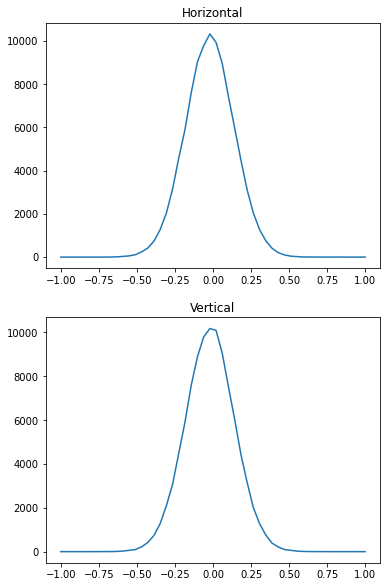

In [11]:
plt.subplot(2, 1, 1)
plt.title('Horizontal')
plt.plot(hbins, hbin_values)
plt.subplot(2, 1, 2)
plt.title('Vertical')
plt.plot(vbins, vbin_values)
plt.subplots_adjust(top=2)

In [12]:
def countit(x, y):
    counts = []
    for i in range(len(x)):
        j = 0
        while j < y[i]:
            counts.append(hx_vals[i])
            j += 1
    return counts

(array([3.0000e+00, 0.0000e+00, 1.2000e+01, 0.0000e+00, 0.0000e+00,
        3.1000e+01, 0.0000e+00, 0.0000e+00, 5.6000e+01, 0.0000e+00,
        1.1100e+02, 0.0000e+00, 0.0000e+00, 2.3900e+02, 0.0000e+00,
        0.0000e+00, 4.1800e+02, 0.0000e+00, 7.3700e+02, 0.0000e+00,
        0.0000e+00, 1.2760e+03, 0.0000e+00, 0.0000e+00, 2.0370e+03,
        0.0000e+00, 0.0000e+00, 3.1510e+03, 0.0000e+00, 4.5960e+03,
        0.0000e+00, 0.0000e+00, 5.9040e+03, 0.0000e+00, 0.0000e+00,
        7.6010e+03, 0.0000e+00, 9.0300e+03, 0.0000e+00, 0.0000e+00,
        9.7740e+03, 0.0000e+00, 0.0000e+00, 1.0319e+04, 0.0000e+00,
        9.9280e+03, 0.0000e+00, 0.0000e+00, 8.9430e+03, 0.0000e+00,
        0.0000e+00, 7.4100e+03, 0.0000e+00, 0.0000e+00, 5.9610e+03,
        0.0000e+00, 4.4850e+03, 0.0000e+00, 0.0000e+00, 3.1070e+03,
        0.0000e+00, 0.0000e+00, 2.0420e+03, 0.0000e+00, 1.2720e+03,
        0.0000e+00, 0.0000e+00, 7.5600e+02, 0.0000e+00, 0.0000e+00,
        4.1000e+02, 0.0000e+00, 2.0700e+02, 0.00

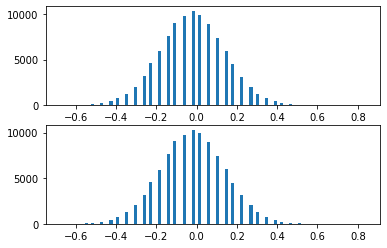

In [13]:
hcounts = countit(hx_vals, hA_vals)
vcounts = countit(vx_vals, vA_vals)
plt.subplot(2, 1, 1)
plt.hist(hcounts, bins=100)
plt.subplot(2, 1, 2)
plt.hist(vcounts, bins=100)